In [ ]:
# IMDB Dataset을 이용해서 감성분류를 해보아요!
# 영어로 되어있는 리뷰를 토큰으로 분리
# vocabulary를 생성한 후 이를 이용해서 리뷰를 숫자의 시퀀스로 변경
# label로는 각 리뷰가 긍정의 리뷰면 1, 부정의 리뷰면 0으로 제공
# num_words는 내가 사용할 vocabulary안의 단어 수
from tensorflow.keras.datasets import imdb

(x_data_train, y_data_train), (x_data_test, y_data_test) =\
imdb.load_data(num_words=500)

print(x_data_train.shape) # (25000,)
print(x_data_test.shape) # (25000,)
print(y_data_train.shape) # (25000,)
print(y_data_test.shape) # (25000,)

print(x_data_train[:5])
print(y_data_train[:5])

(25000,)
(25000,)
(25000,)
(25000,)
[list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 10

In [ ]:
# 각각의 review의 길이를 알아보아요!
print(len(x_data_train[0])) # 218
print(len(x_data_train[1])) # 189
print(len(x_data_train[2])) # 141

218
189
141


[218 189 141 550 147  43 123 562 233 130]
238.71364
178.0


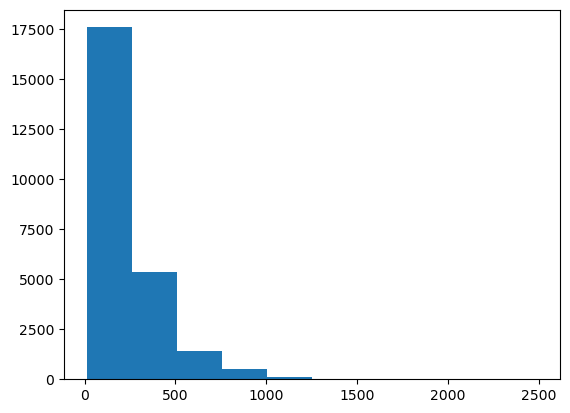

In [12]:
# 이런 review 데이터를 Model안레 집어넣어서 연산을 수행하려면
# 데이터릐 길이가 같아야해요. (shape이 같아야해요!)
# 각 review마다 길이가 다른데 어떻게 리뷰의 길이를 똑같이 만드나요?
# 가장 길이가 긴 리부의 길이로 전체 리뷰들의 길이를 늘려요! => 공간의 낭비
# 적절한 길이로 전체 리뷰들의 길이를 제한 => CNN에서 이미지 크기 고정시키듯이
# => 어떤 리뷰들은 조금 짤릴꺼구요, 어떤 리뷰들은 길이가 늘어날거에요!
import numpy as np
import matplotlib.pyplot as plt

# 각 review에 대한 길이를 구해서 ndarray에 저장
lengths = np.array([len(x) for x in x_data_train])
print(lengths[:10]) # [218 189 141 550 147  43 123 562 233 130]

print(np.mean(lengths)) # 238.71364
print(np.median(lengths)) # 178.0

plt.hist(lengths)
plt.show()

In [ ]:
# 평균, 중앙값 histogram을 구해봤더니..
# 대략 100 ~ 150개의 token으로 이루어진 review들이 많다는 걸 확인할 수 있었어요!
# 그래서 token 100개로 모든 review의 길이를 조절!
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 모든 review에 대한 길이가 token 100개로 맞춰지게되요!
# 기본적으로 padding 처리는 짧은 길이는 앞쪽에 0(padding)을 추가
# 길이가 긴 review(길이가 긴 데이터)는 앞쪽 데이터를 잘라요!
x_data_train_seq = pad_sequences(x_data_train,
                                 maxlen=100)
print(x_data_train_seq.shape) # (25000, 100)

(25000, 100)


In [ ]:
print(x_data_train_seq[0])
# 어떻게하면 각 token에 대한 값들이 볼륨을 가지지 않고 특정 category를 표현하도록
# 할 수 있을까요? -> one-hot encoding
# one-hot으로 바꾸면 카테고리 수는 500개

[  2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8   4 107
 117   2  15 256   4   2   7   2   5   2  36  71  43   2 476  26 400 317
  46   7   4   2   2  13 104  88   4 381  15 297  98  32   2  56  26 141
   6 194   2  18   4 226  22  21 134 476  26 480   5 144  30   2  18  51
  36  28 224  92  25 104   4 226  65  16  38   2  88  12  16 283   5  16
   2 113 103  32  15  16   2  19 178  32]


In [17]:
# 데이터가 준비되었으니 이제 모델을 구성해 보아요!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=8,
                    activation='tanh',
                    input_shape=(100,500))) # one-hot 처리때문에 
model.add(Dense(units=1,
                activation='sigmoid'))

In [ ]:
# 입력값으로 token에 대한 one-hot encoding값을 사용해야 되기 때문에
# one-hot encoding으로 각 review가 가지는 token들을 반환
from tensorflow.keras.utils import to_categorical

x_data_train_onehot = to_categorical(x_data_train_seq,
                                     num_classes=500)
print(x_data_train_onehot.shape) # (25000, 100, 500)
# (sample의 개수, token(timestep)의 개수, feature(token을 표현하는 데이터값))
# 공간의 낭비가 생겨요 -> one-hot encoding을 사용해서 그래요.

(25000, 100, 500)


In [2]:
%reset -f

import tensorflow as tf
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [ ]:
# Data Loading
(x_data_train, y_data_train), (x_data_test, y_data_test) =\
imdb.load_data(num_words=500)

x_data_train, x_data_valid, y_data_train, y_data_valid =\
train_test_split(x_data_train,
                 y_data_train,
                 test_size=0.2,
                 stratify=y_data_train,
                 random_state=42)

# Padding 처리 -> 길이를 100으로 변경
x_data_train_seq = pad_sequences(x_data_train,
                                 maxlen=100)
x_data_valid_seq = pad_sequences(x_data_valid,
                                 maxlen=100)

# one-hot 처리 -> 클래스 개수는 500개 (여기서 메모리 부족 발생)
x_data_train_onehot = to_categorical(x_data_train_seq,
                                     num_classes=500)
x_data_valid_onehot = to_categorical(x_data_valid_seq,
                                     num_classes=500)

# Model
model = Sequential()
model.add(SimpleRNN(units=8,
                    activation='tanh',
                    input_shape=(100,500)))
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

es_callback = EarlyStopping(monitor='val_loss',
                            patience=5,
                            restore_best_weights=True,
                            verbose=1)
cp_callback = ModelCheckpoint(filepath='./IMDB_SimpleRNN_model.weights.h5',
                              monitor='val_loss',
                              save_best_only=True,
                              save_weights_only=True,
                              verbose=1)
log_dir = './logs/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tb_callback = TensorBoard(log_dir=log_dir,
                          histogram_freq=1)


In [ ]:
# Model 학습
# tensorflow 2.16, CUDA 12.3에서는 오류! 메모리 오류!
# tensorflow 2.13, CUDA 11.8에서는 동작!
# 버전이 올라가면서 메모리 처리 방식이 바뀌었기 때문
# Lambda layer를 사용하여 해결가능
model.fit(x_data_train_onehot,
          y_data_train,
          epochs=100,
          batch_size=64,
          validation_data=(x_data_valid_onehot, y_data_valid),
          callbacks=[es_callback, cp_callback, tb_callback],
          verbose=1)

: 

In [ ]:
# Data Loading
(x_data_train, y_data_train), (x_data_test, y_data_test) =\
imdb.load_data(num_words=500)

x_data_train, x_data_valid, y_data_train, y_data_valid =\
train_test_split(x_data_train,
                 y_data_train,
                 test_size=0.2,
                 stratify=y_data_train,
                 random_state=42)

# Padding 처리 -> 길이를 100으로 변경
x_data_train_seq = pad_sequences(x_data_train,
                                 maxlen=100)
x_data_valid_seq = pad_sequences(x_data_valid,
                                 maxlen=100)

# one-hot 처리 -> 클래스 개수는 500개 (여기서 메모리 부족 발생)
# 이 형태의 구현은 메모리 부족을 발생시킬 수 있어요!
# x_data_train_onehot = to_categorical(x_data_train_seq,
#                                      num_classes=500)
# x_data_valid_onehot = to_categorical(x_data_valid_seq,
#                                      num_classes=500)

# Model
model = Sequential()
model.add(Lambda(lambda x: tf.one_hot(tf.cast(x, tf.int32), 500),
                 input_shape=(100,)))
model.add(SimpleRNN(units=8,
                    activation='tanh'))
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

es_callback = EarlyStopping(monitor='val_loss',
                            patience=5,
                            restore_best_weights=True,
                            verbose=1)
cp_callback = ModelCheckpoint(filepath='./IMDB_SimpleRNN_model.weights.h5',
                              monitor='val_loss',
                              save_best_only=True,
                              save_weights_only=True,
                              verbose=1)
log_dir = './logs/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tb_callback = TensorBoard(log_dir=log_dir,
                          histogram_freq=1)


In [ ]:
model.fit(x_data_train_seq,
          y_data_train,
          epochs=100,
          batch_size=64,
          validation_data=(x_data_valid_seq, y_data_valid),
          callbacks=[es_callback, cp_callback, tb_callback],
          verbose=1)
# Epoch 13/100
# 147/313 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.8444 - loss: 0.3649
# Epoch 13: val_loss did not improve from 0.47271
# 313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8370 - loss: 0.3757 - val_accuracy: 0.7744 - val_loss: 0.4881
# Epoch 13: early stopping
# Restoring model weights from the end of the best epoch: 8.

In [ ]:
x_data_test_seq = pad_sequences(x_data_test,
                                maxlen=100)

result = model.evaluate(x_data_test_seq, y_data_test)
print(result) # [0.4550960659980774, 0.7898399829864502]

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7904 - loss: 0.4586 
[0.4550960659980774, 0.7898399829864502]
